In [1]:
library(caretEnsemble)
library(RColorBrewer)
library(tm)
library(datarium)
library(leaps)
library(glmnet)
library(pls)
library(gam)
library(splines)
library(MVA)
library(nortest)
library(mvnormtest)
library(pastecs)
library(mvtnorm)
library(igraph)
library(dplyr)
library(ggplot2)
library(ggraph)
library(caret)
library(car)
library(mlbench)
library(tidyverse)
library(MASS)
library(ISLR)
library(psych)
library(faraway)
library(pls)
library(Matrix)
library(stats)
library(biotools)
library(ggpubr)
library(broom)
library(leaps)
library(tidyverse)
library(funModeling)
library(Hmisc)

Loading required package: NLP

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


Loading required package: splines

Loading required package: foreach

Loaded gam 1.20


Loading required package: HSAUR2

Loading required package: tools


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following ob

In [2]:
data01 <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv", header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1")

In [3]:
head(data01)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [4]:
str(data01)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [41]:
admit_f <- as.factor(data01$admit)
admit_f

[1] 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 [38] 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
[112] 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
[149] 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
[186] 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0
[223] 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
[260] 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
[297] 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[334] 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
[371] 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
Levels: 0 1

In [49]:
# Subsetting the data and keeping the required variables
data01 <- data01[ ,c("admit", "gre", "gpa", "rank")]


In [45]:
# Checking the dim
dim(data01)

[1] 400   4

In [50]:
# Generating the frequency table
table(data01$admit)


  0   1 
273 127 

In [51]:
table(data01$rank)


  1   2   3   4 
 61 151 121  67 

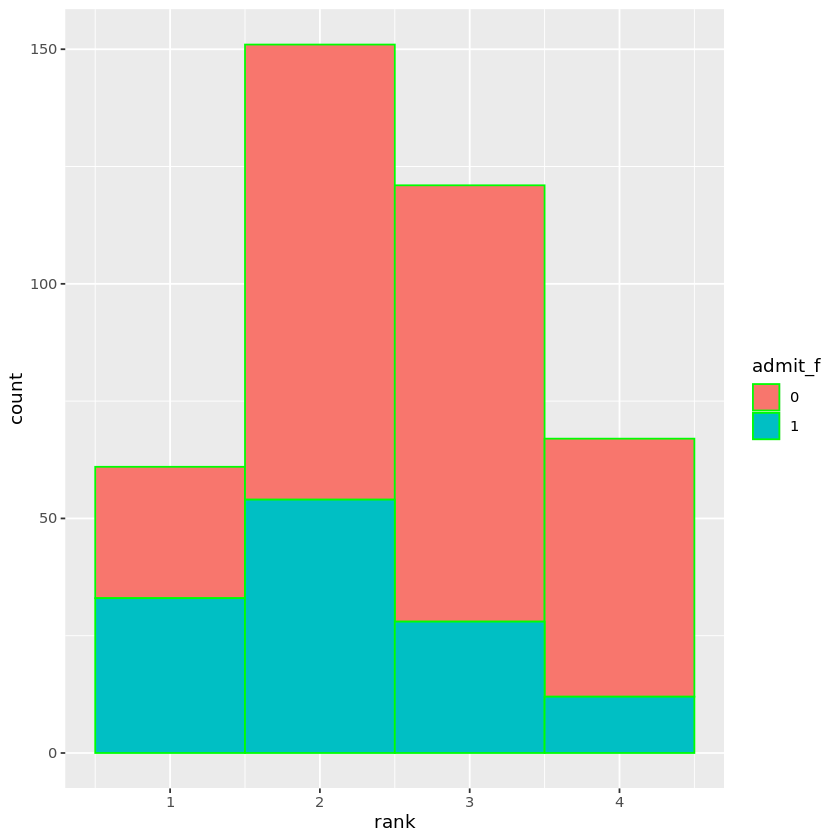

In [68]:
ggplot(data01, aes(rank)) +
  geom_histogram(aes(fill = admit_f), color = "green", binwidth = 1)

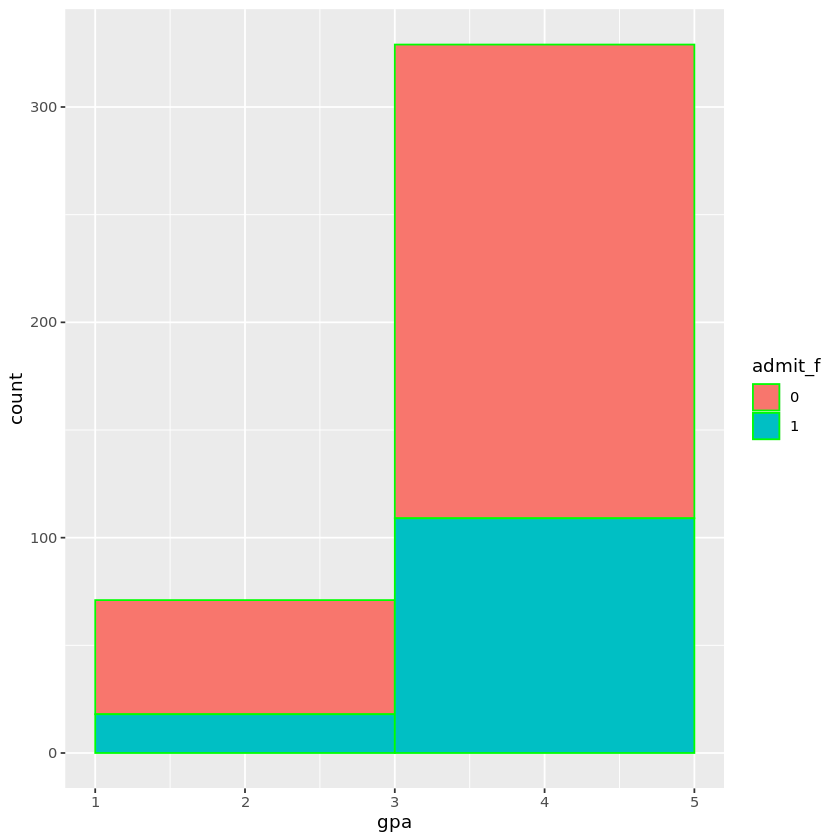

In [71]:
ggplot(data01, aes(gpa)) +
  geom_histogram(aes(fill = admit_f), color = "green", binwidth = 2)

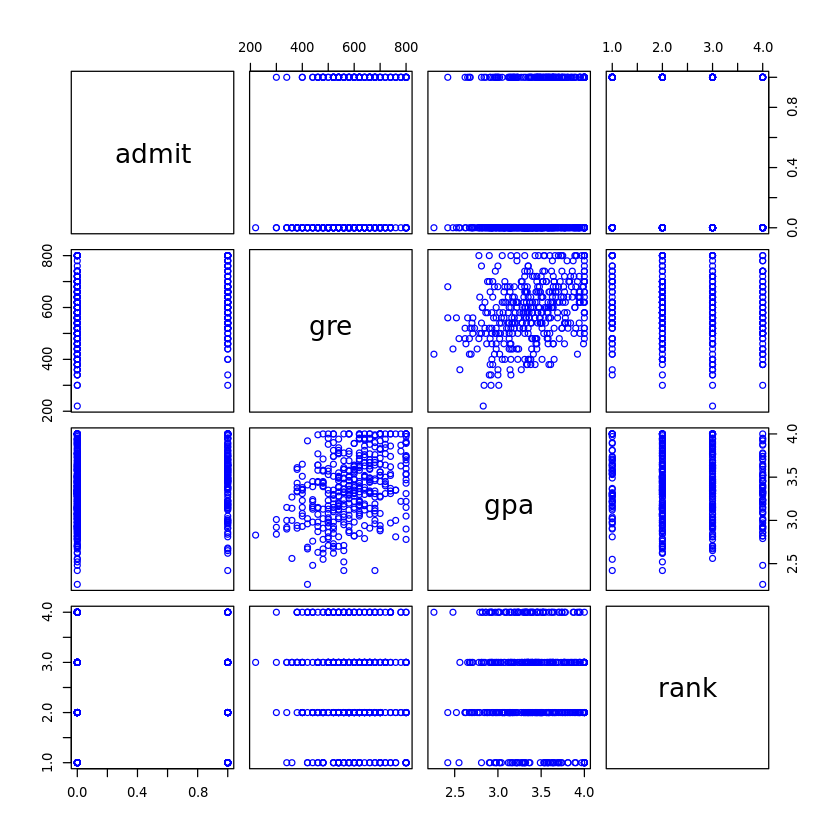

In [72]:
pairs(data01, col = "blue")

In [73]:
round(stat.desc(cor(data01)),3)

,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,4.000,4.000,4.000,4.000
nbr.null,0.000,0.000,0.000,0.000
nbr.na,0.000,0.000,0.000,0.000
min,-0.243,-0.123,-0.057,-0.243
max,1.000,1.000,1.000,1.000
range,1.243,1.123,1.057,1.243
sum,1.120,1.445,1.505,0.577
median,0.181,0.284,0.281,-0.090
mean,0.280,0.361,0.376,0.144


In [19]:
library(corrplot)

corrplot 0.90 loaded


Attaching package: ‘corrplot’


The following object is masked from ‘package:pls’:

    corrplot




In [12]:
data01c <- cor(data01)

In [13]:
head(data01c)

,admit,gre,gpa,rank
admit,1.0000000,0.1844343,0.17821225,-0.24251318
gre,0.1844343,1.0000000,0.38426588,-0.12344707
gpa,0.1782123,0.3842659,1.00000000,-0.05746077
rank,-0.2425132,-0.1234471,-0.05746077,1.00000000


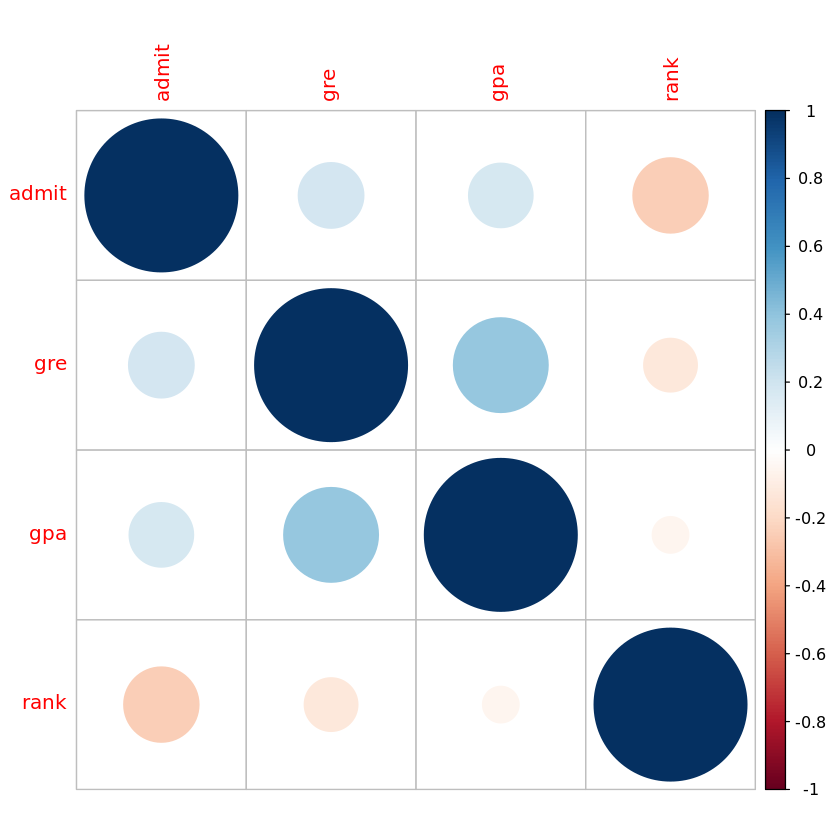

In [20]:
corrplot(data01c)

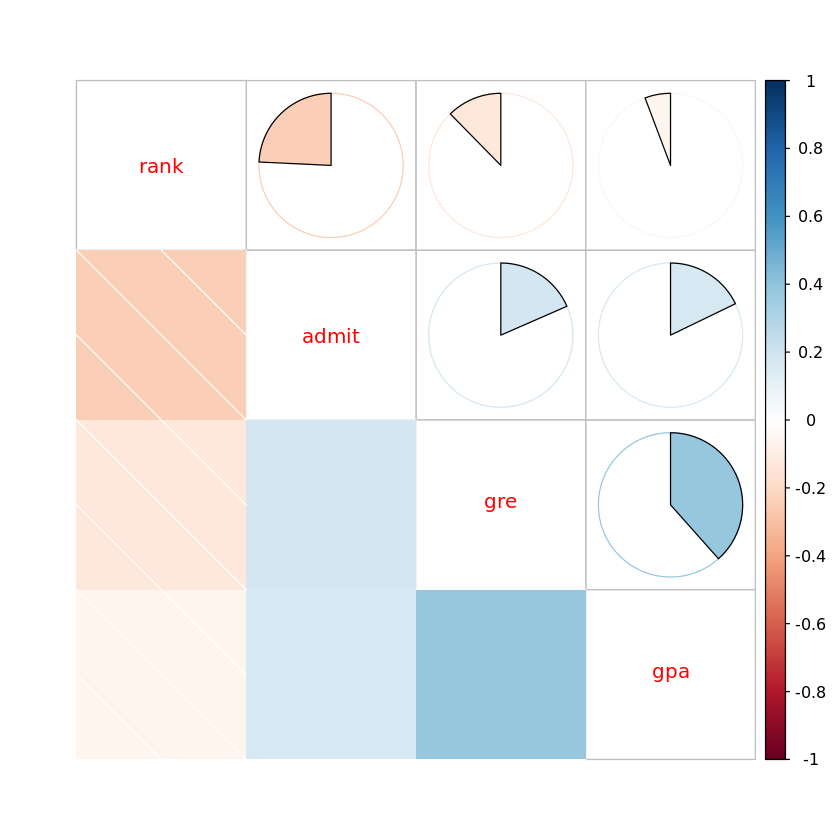

In [21]:
corrplot.mixed(data01c, lower = 'shade', upper = 'pie', order = 'hclust')

In [6]:
# Exploratory data analysis
# Number of observations (rows) and variables
glimpse(data01)

Rows: 400
Columns: 4
$ admit <int> 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ gre   <int> 380, 660, 800, 640, 520, 760, 560, 400, 540, 700, 800, 440, 760,…
$ gpa   <dbl> 3.61, 3.67, 4.00, 3.19, 2.93, 3.00, 2.98, 3.08, 3.39, 3.92, 4.00…
$ rank  <int> 3, 3, 1, 4, 4, 2, 1, 2, 3, 2, 4, 1, 1, 2, 1, 3, 4, 3, 2, 1, 3, 2…


In [7]:
# Getting the metrics about data types, zeros, infinite numbers, and missing values
status(data01)

,variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
admit,admit,273,0.6825,0,0,0,0,integer,2
gre,gre,0,0.0000,0,0,0,0,integer,26
gpa,gpa,0,0.0000,0,0,0,0,numeric,132
rank,rank,0,0.0000,0,0,0,0,integer,4


In [9]:
# Analyzing numerical variables
# # Quantitatively
profiling_num(data01)

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99,skewness,kurtosis,iqr,range_98,range_80
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
admit,0.3175,0.4660867,1.4679897,0.0000,0.0000,0.00,0.000,1.00,1,1,0.78409678,1.614808,1.00,"[0, 1]","[0, 1]"
gre,587.7000,115.5165364,0.1965570,339.6000,399.0000,520.00,580.000,660.00,800,800,-0.14381471,2.657985,140.00,"[339.6, 800]","[440, 740]"
gpa,3.3899,0.3805668,0.1122649,2.5196,2.7585,3.13,3.395,3.67,4,4,-0.20791428,2.412871,0.54,"[2.5196, 4]","[2.9, 3.94]"
rank,2.4850,0.9444602,0.3800645,1.0000,1.0000,2.00,2.000,3.00,4,4,0.09685771,2.104556,1.00,"[1, 4]","[1, 4]"


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


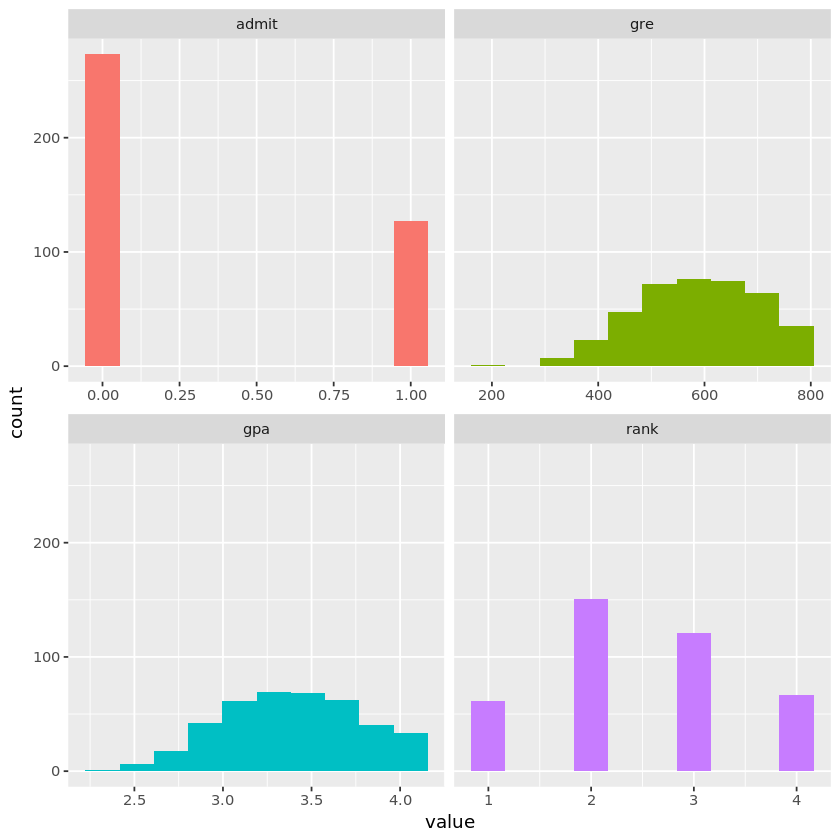

In [10]:
# Graphically
plot_num(data01)

In [11]:
# Analyzing numerical and categorical at the same time
describe(data01)


data01 

 4  Variables      400  Observations
--------------------------------------------------------------------------------
admit 
       n  missing distinct     Info      Sum     Mean      Gmd 
     400        0        2     0.65      127   0.3175   0.4345 

--------------------------------------------------------------------------------
gre 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     400        0       26    0.997    587.7    131.2      399      440 
     .25      .50      .75      .90      .95 
     520      580      660      740      800 

lowest : 220 300 340 360 380, highest: 720 740 760 780 800
--------------------------------------------------------------------------------
gpa 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     400        0      132        1     3.39   0.4351    2.758    2.900 
     .25      .50      .75      .90      .95 
   3.130    3.395    3.670    3.940    4.000 

lowest : 2.26 2.42 2.48 2.52

In [75]:
# Splitting the data into train and test
index <- createDataPartition(data01$admit, p = .70, list = FALSE)
train <- data01[index, ]
test <- data01[-index, ]

In [28]:
# Training the model
model01 <- glm(admit ~ ., family = binomial(), train)

In [29]:
# Checking the model
summary(model01)


Call:
glm(formula = admit ~ ., family = binomial(), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6215  -0.9049  -0.6054   1.1610   2.1185  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.062512   1.366750  -2.241   0.0250 *  
gre          0.002386   0.001287   1.854   0.0637 .  
gpa          0.697089   0.393053   1.774   0.0761 .  
rank        -0.611697   0.153179  -3.993 6.51e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 355.98  on 279  degrees of freedom
Residual deviance: 325.11  on 276  degrees of freedom
AIC: 333.11

Number of Fisher Scoring iterations: 3


In [32]:
exp(-0.611697)

[1] 0.5424296

In [38]:
p = exp(-0.611697)
p

[1] 0.5424296

In [39]:
k = 1- p
k

[1] 0.4575704

In [30]:
# Predicting in the test dataset
model01_pred <- predict(model01, test, type = "response")

In [148]:
summary(model01_pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06118 0.19618 0.31002 0.31508 0.40660 0.69290 

In [78]:
# Converting from probability to actual output
model01_pred_conv <- ifelse(model01$fitted.values >= 0.5, "0", "1")


In [79]:
# Generating the classification table - train
model01_clstab_train <- table(train$admit, model01_pred_conv)
model01_clstab_train

   model01_pred_conv
      0   1
  0  28 164
  1  13  75

In [82]:
# Converting from probability to actual output
model01_test_pred <- ifelse(model01_pred >= 0.5, "0", "1")

In [83]:
# Generating the classification table - test
model01_clstab_test <- table(test$admit, model01_test_pred)
model01_clstab_test

   model01_test_pred
     0  1
  0 13 68
  1  1 38

In [80]:
# Accuracy in Training dataset
accuracy_model01_train <- sum(diag(model01_clstab_train))/sum(model01_clstab_train)*100
accuracy_model01_train

[1] 36.78571

In [85]:
# Accuracy in Test dataset
accuracy_model01__test <- sum(diag(model01_clstab_test))/sum(model01_clstab_test)*100
accuracy_model01__test

[1] 42.5

In [94]:
# Recall in Train dataset(also known as True Positive Rate): indicates how often does the model predicts actual TRUE from the overall TRUE events.
Recall <- (model01_clstab_train[2, 2]/sum(model01_clstab_train[ , 2]))*100
Recall

[1] 31.38075

In [95]:
# True Negative Rate in Train dataset: indicates how often does the model predicts actual nonevents from the overall nonevents.
TNR <- (model01_clstab_train[1, 1]/sum(model01_clstab_train[1, ]))*100
TNR

[1] 14.58333

In [96]:
# Precision in Train dataset
Precision <- (model01_clstab_train[2, 2]/sum(model01_clstab_train[ , 2]))*100
Precision

[1] 31.38075

In [97]:
# F-Score is a harmonic mean of recall and precision. The score value lies between 0 and 1. The value of 1 represents perfect precision & recall. The value 0 represents the worst case.
F_Score <- (2 * Precision * Recall / (Precision + Recall))/100
F_Score

[1] 0.3138075

In [98]:
library(pROC)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [99]:
roc <- roc(train$admit, model01$fitted.values)
auc(roc)

Setting levels: control = 0, case = 1

Setting direction: controls > cases



Area under the curve: 0.5109

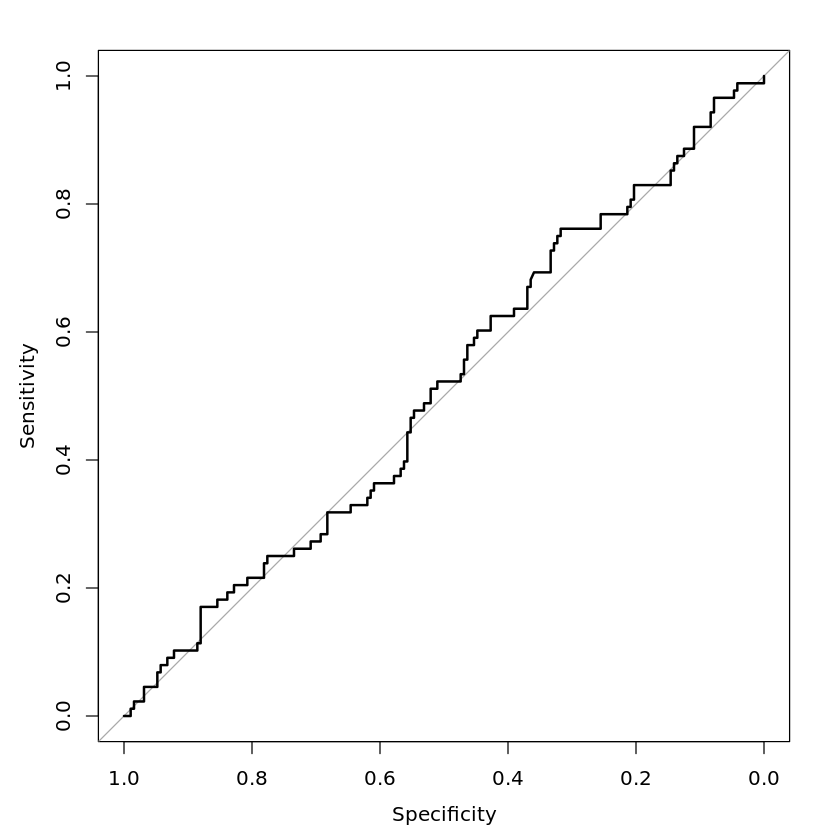

In [101]:
plot(roc)

In [102]:
data02 <- read.csv('UtilityFailure-2.csv')
head(data02)

,SN,Status,Age,Failure,Light_OutageCount,MVA,PM_Count,RM_Count,UM_Count,Total_PMCount
,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1,In-Service,45.66185,NO,4,25,27,0,7,34
2,2,In-Service,45.66185,NO,4,25,25,0,3,28
3,3,Retired,44.63708,NO,12,10,26,0,0,26
4,4,In-Service,26.27281,YES,1,5,26,0,1,27
5,5,In-Service,42.43172,NO,1,5,21,0,1,22
6,6,Retired,0.00000,NO,25,10,24,0,0,24


In [103]:
str(data02)

'data.frame':	678 obs. of  10 variables:
 $ SN               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Status           : chr  "In-Service" "In-Service" "Retired" "In-Service" ...
 $ Age              : num  45.7 45.7 44.6 26.3 42.4 ...
 $ Failure          : chr  "NO" "NO" "NO" "YES" ...
 $ Light_OutageCount: int  4 4 12 1 1 25 20 20 16 16 ...
 $ MVA              : num  25 25 10 5 5 10 10 10 10 10 ...
 $ PM_Count         : int  27 25 26 26 21 24 23 25 25 22 ...
 $ RM_Count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ UM_Count         : int  7 3 0 1 1 0 0 0 1 0 ...
 $ Total_PMCount    : int  34 28 26 27 22 24 23 25 26 22 ...


In [104]:
summary(data02)

       SN           Status               Age          Failure         
 Min.   :  1.0   Length:678         Min.   : 0.00   Length:678        
 1st Qu.:178.2   Class :character   1st Qu.:14.40   Class :character  
 Median :350.5   Mode  :character   Median :30.22   Mode  :character  
 Mean   :351.2                      Mean   :28.80                     
 3rd Qu.:525.8                      3rd Qu.:42.60                     
 Max.   :702.0                      Max.   :58.79                     
                                    NA's   :1                         
 Light_OutageCount      MVA          PM_Count        RM_Count     
 Min.   :  0.000   Min.   : 1.5   Min.   : 0.00   Min.   :0.0000  
 1st Qu.:  0.000   1st Qu.:10.0   1st Qu.:17.00   1st Qu.:0.0000  
 Median :  0.000   Median :20.0   Median :23.00   Median :0.0000  
 Mean   :  7.213   Mean   :17.9   Mean   :23.11   Mean   :0.3997  
 3rd Qu.:  6.000   3rd Qu.:25.0   3rd Qu.:30.00   3rd Qu.:1.0000  
 Max.   :171.000   Max.   :35.

In [106]:
# Converting to factor variables
data02$Status <- as.factor(data02$Status)
data02$Failure <- as.factor(data02$Failure)

In [107]:
str(data02)

'data.frame':	678 obs. of  10 variables:
 $ SN               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Status           : Factor w/ 2 levels "In-Service","Retired": 1 1 2 1 1 2 2 2 2 2 ...
 $ Age              : num  45.7 45.7 44.6 26.3 42.4 ...
 $ Failure          : Factor w/ 2 levels "NO","YES": 1 1 1 2 1 1 1 2 1 1 ...
 $ Light_OutageCount: int  4 4 12 1 1 25 20 20 16 16 ...
 $ MVA              : num  25 25 10 5 5 10 10 10 10 10 ...
 $ PM_Count         : int  27 25 26 26 21 24 23 25 25 22 ...
 $ RM_Count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ UM_Count         : int  7 3 0 1 1 0 0 0 1 0 ...
 $ Total_PMCount    : int  34 28 26 27 22 24 23 25 26 22 ...


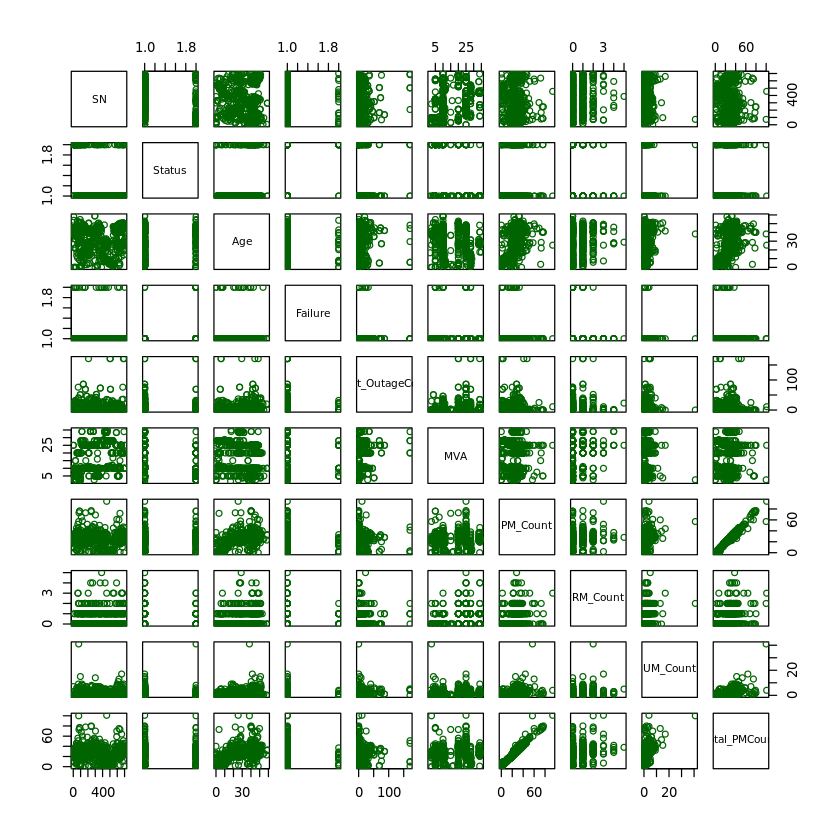

In [108]:
pairs(data02, col = "darkgreen")

In [111]:
round(stat.desc(cor(data02[, 5:10])),2)

Warning message in qt((0.5 + p/2), (Nbrval - 1)):
“NaNs produced”


,Light_OutageCount,MVA,PM_Count,RM_Count,UM_Count,Total_PMCount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,1,5.00,5.00,5.00,5.00,5.00
nbr.null,0,0.00,0.00,0.00,0.00,0.00
nbr.na,5,1.00,1.00,1.00,1.00,1.00
min,1,-0.07,-0.07,0.17,0.08,-0.04
max,1,1.00,1.00,1.00,1.00,1.00
range,0,1.07,1.07,0.83,0.92,1.04
sum,1,1.19,2.41,1.89,2.13,2.69
median,1,0.08,0.32,0.24,0.32,0.49
mean,1,0.24,0.48,0.38,0.43,0.54


In [112]:
CM <- cor(data02[, 5:10])
CM

,Light_OutageCount,MVA,PM_Count,RM_Count,UM_Count,Total_PMCount
Light_OutageCount,1,NA,NA,NA,NA,NA
MVA,NA,1.00000000,-0.06992971,0.2194637,0.0751832,-0.0392208
PM_Count,NA,-0.06992971,1.00000000,0.1735181,0.3230318,0.9821974
RM_Count,NA,0.21946370,0.17351813,1.0000000,0.2423843,0.2534218
UM_Count,NA,0.07518320,0.32303176,0.2423843,1.0000000,0.4889054
Total_PMCount,NA,-0.03922080,0.98219744,0.2534218,0.4889054,1.0000000


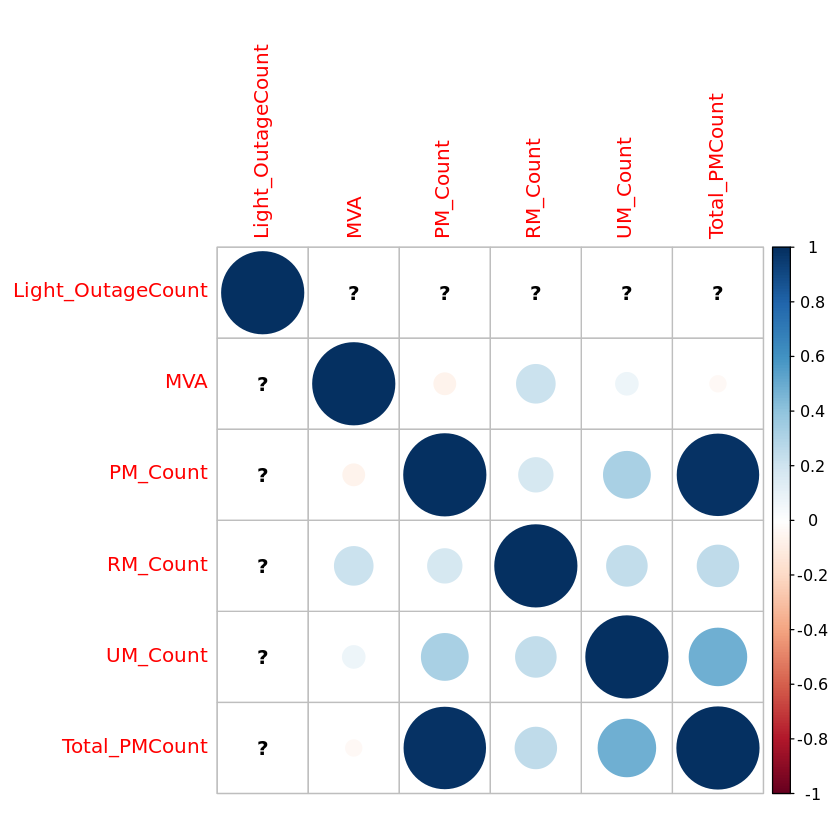

In [113]:
corrplot(CM)

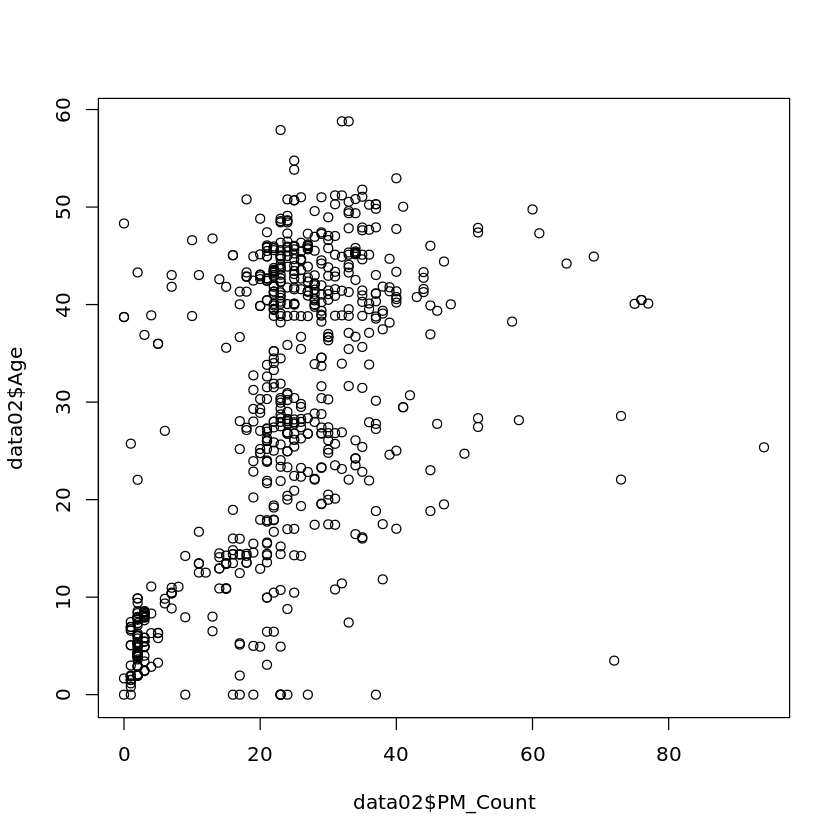

In [121]:
plot(data02$Age ~ data02$PM_Count)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


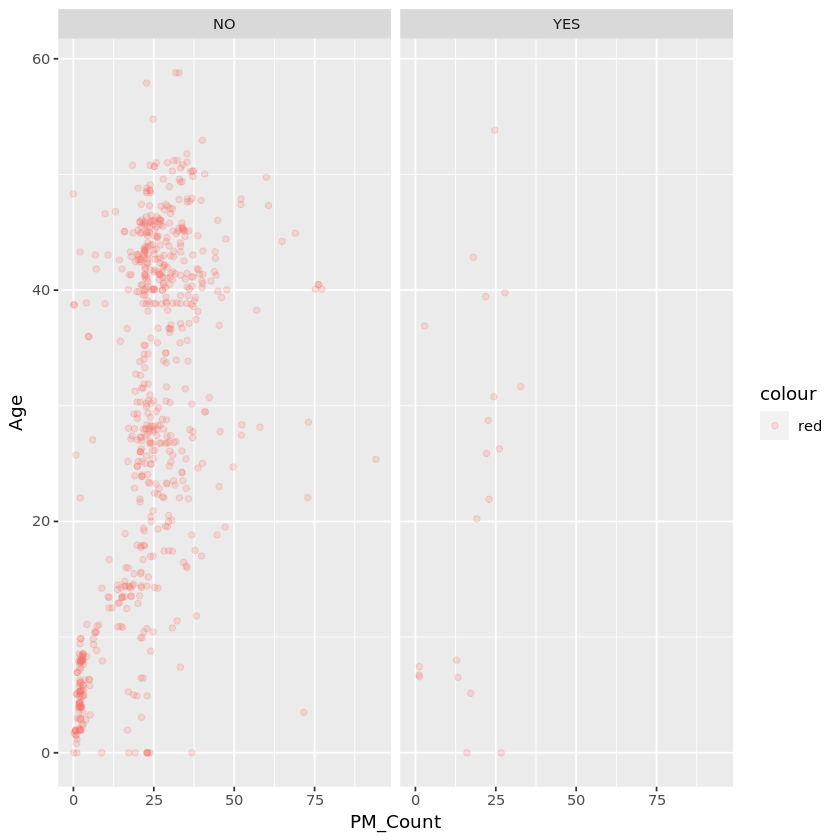

In [125]:
ggplot(data02, aes(x=PM_Count, y=Age, col = 'red')) + geom_point(alpha=0.2, position=position_jitter()) + facet_grid(~Failure)


In [126]:
status(data02)

,variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
SN,SN,0,0.000000000,0,0.000000000,0,0,integer,678
Status,Status,0,0.000000000,0,0.000000000,0,0,factor,2
Age,Age,13,0.019174041,1,0.001474926,0,0,numeric,553
Failure,Failure,0,0.000000000,0,0.000000000,0,0,factor,2
Light_OutageCount,Light_OutageCount,430,0.634218289,8,0.011799410,0,0,integer,41
MVA,MVA,0,0.000000000,0,0.000000000,0,0,numeric,25
PM_Count,PM_Count,5,0.007374631,0,0.000000000,0,0,integer,63
RM_Count,RM_Count,483,0.712389381,0,0.000000000,0,0,integer,6
UM_Count,UM_Count,221,0.325958702,0,0.000000000,0,0,integer,16


In [127]:
sum(is.na(data02))

[1] 9

In [128]:
# Keeping only the na.omit() function
data02 <- na.omit(data02)

In [129]:
sum(is.na(data02))

[1] 0

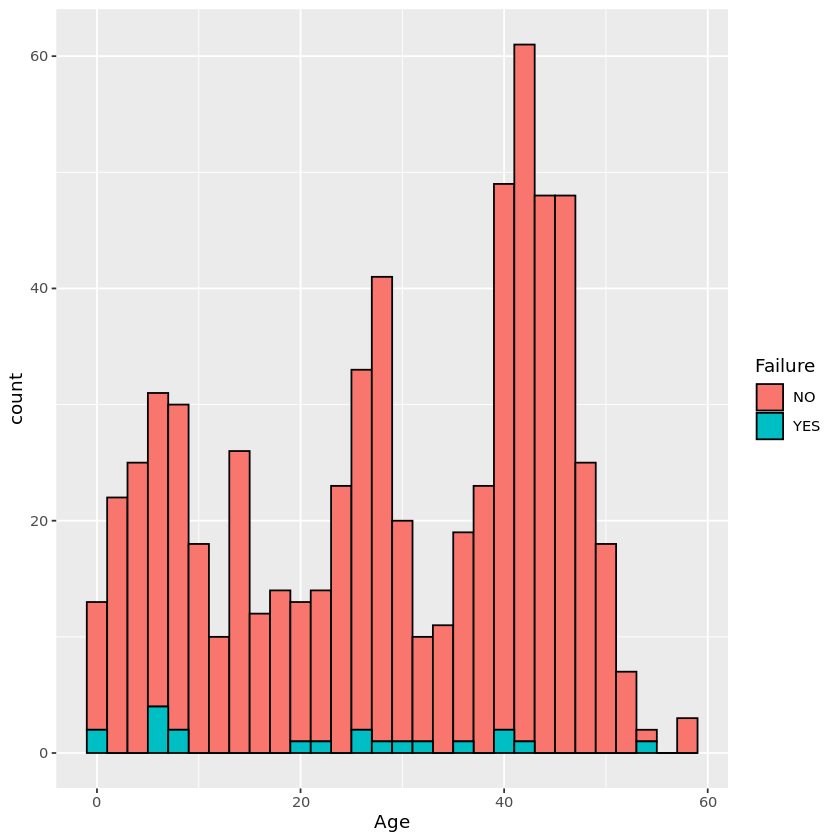

In [131]:
ggplot(data02, aes(Age)) +
  geom_histogram(aes(fill = Failure), color = "black", binwidth = 2)

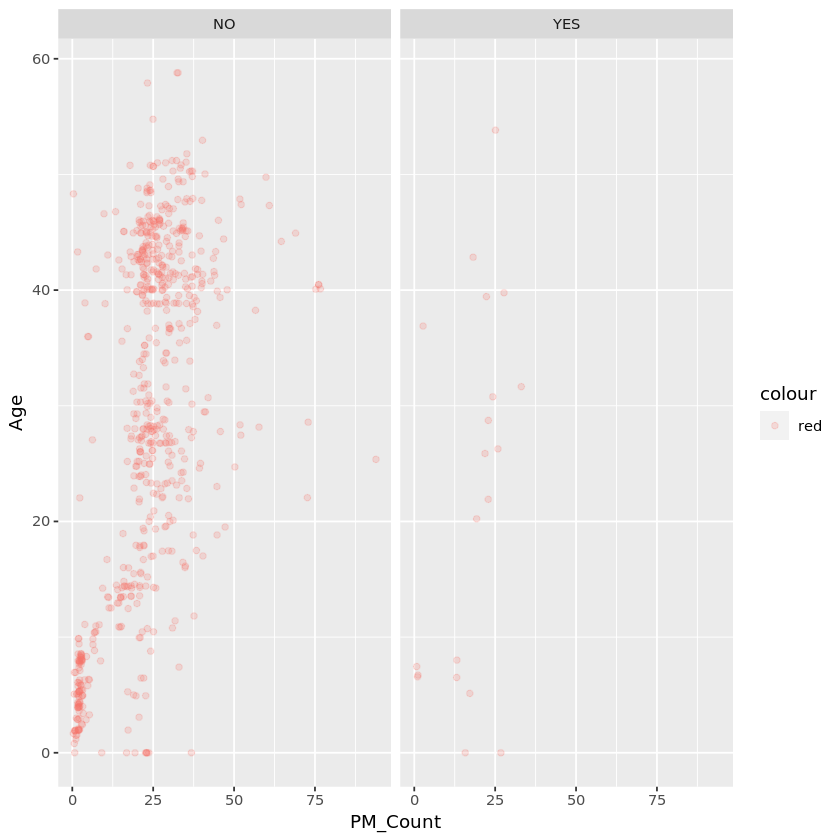

In [132]:
ggplot(data02, aes(x=PM_Count, y=Age, col = 'red')) + geom_point(alpha=0.2, position=position_jitter()) + facet_grid(~Failure)

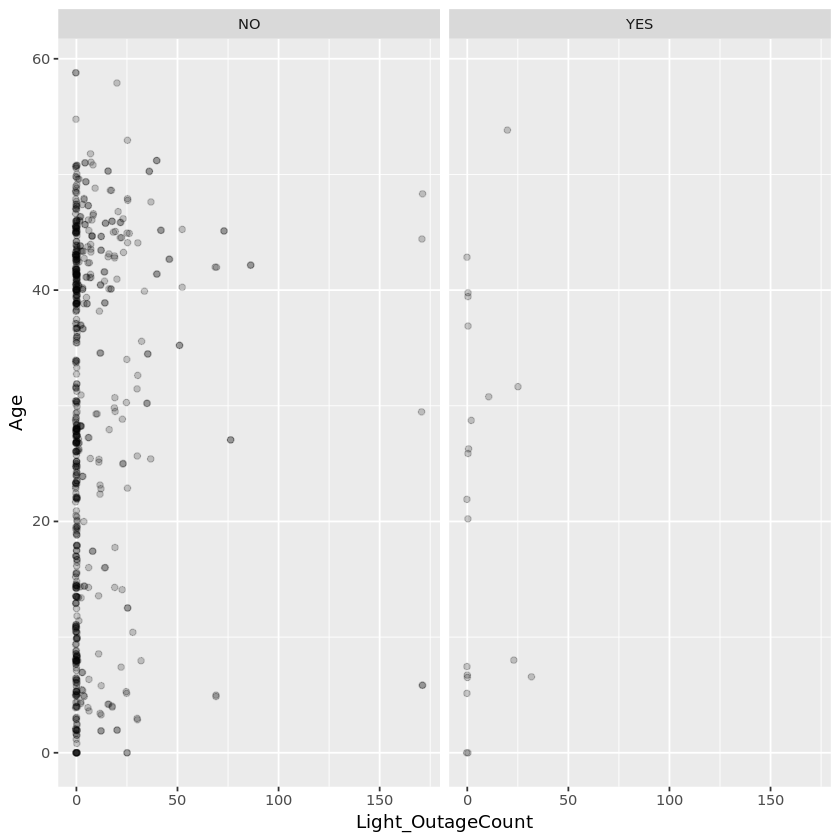

In [137]:
ggplot(data02, aes(x=Light_OutageCount, y=Age)) + geom_point(alpha=0.2, position=position_jitter()) + facet_grid(~Failure)

In [138]:
# Splitting the data into train and test
index1 <- createDataPartition(data02$Failure, p = .70, list = FALSE)
train1 <- data02[index1, ]
test1 <- data02[-index1, ]

In [140]:
# Training the model
model02 <- glm(Failure ~ ., family = binomial(), train1)


In [141]:
summary(model02)


Call:
glm(formula = Failure ~ ., family = binomial(), data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1414  -0.1003  -0.0380  -0.0212   4.1845  

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -6.588e+00  1.604e+00  -4.107 4.01e-05 ***
SN                -5.715e-05  1.514e-03  -0.038   0.9699    
StatusRetired      6.657e+00  1.491e+00   4.466 7.96e-06 ***
Age               -2.555e-02  2.169e-02  -1.178   0.2387    
Light_OutageCount -1.256e-02  3.219e-02  -0.390   0.6963    
MVA                9.767e-02  5.249e-02   1.861   0.0628 .  
PM_Count          -7.782e-02  3.887e-02  -2.002   0.0453 *  
RM_Count          -1.011e-01  6.933e-01  -0.146   0.8840    
UM_Count           5.271e-02  1.293e-01   0.408   0.6835    
Total_PMCount             NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter

In [142]:
simple_odds_intercept <- exp(-6.588e+00)

In [143]:
simple_odds_intercept

[1] 0.001376791

In [144]:
odds_value_i <- 1 - simple_odds_intercept
odds_value_i

[1] 0.9986232

In [145]:
simple_odds_sts_rtrd <- exp(6.657e+00)
simple_odds_sts_rtrd

[1] 778.2128

In [147]:
# Predicting in the test dataset
model02_pred_test <- predict(model02, test1, type = "response")
summary(model02_pred_test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000291 0.0002616 0.0011117 0.0519300 0.0139128 0.9176618 

In [149]:
# Converting from probability to actual output: train1
model02_train1_pred <- ifelse(model02$fitted.values >= 0.5, "Yes", "No")

In [150]:
# Generating the classification table
clstab_train1 <- table(train1$Failure, model02_train1_pred)
clstab_train1

     model02_train1_pred
       No Yes
  NO  455   0
  YES  12   2

In [151]:
# Converting from probability to actual output: test1
model02_test1_pred <- ifelse(model02_pred_test >= 0.5, "Yes", "No")

In [155]:
# Generating the classification table
clstab_test1 <- table(test1$Failure, model02_test1_pred)
clstab_test1

     model02_test1_pred
       No Yes
  NO  193   1
  YES   3   3

In [156]:
# Accuracy in Training dataset
accuracy_train1 <- sum(diag(clstab_train1))/sum(clstab_train1)*100
accuracy_train1

[1] 97.44136

In [157]:
# Recall in Train dataset(True Positive Rate)
Recall1 <- (clstab_train1[2, 2]/sum(clstab_train1[2, ]))*100
Recall1

[1] 14.28571

In [158]:
# True Negative Rate in Train dataset
TNR1 <- (clstab_train1[1, 1]/sum(clstab_train1[1, ]))*100
TNR1

[1] 100

In [159]:
# Precision in Train dataset
Precision1 <- (clstab_train1[2, 2]/sum(clstab_train1[, 2]))*100
Precision1

[1] 100

In [160]:
# F-Score is a harmonic mean of recall and precision.
F_Score1 <- (2 * Precision1 * Recall1 / (Precision1 + Recall1))/100
F_Score1

[1] 0.25

In [161]:
# ROC Curve
roc1 <- roc(train1$Failure, model02$fitted.values)
auc(roc1)

Setting levels: control = NO, case = YES

Setting direction: controls < cases



Area under the curve: 0.9198

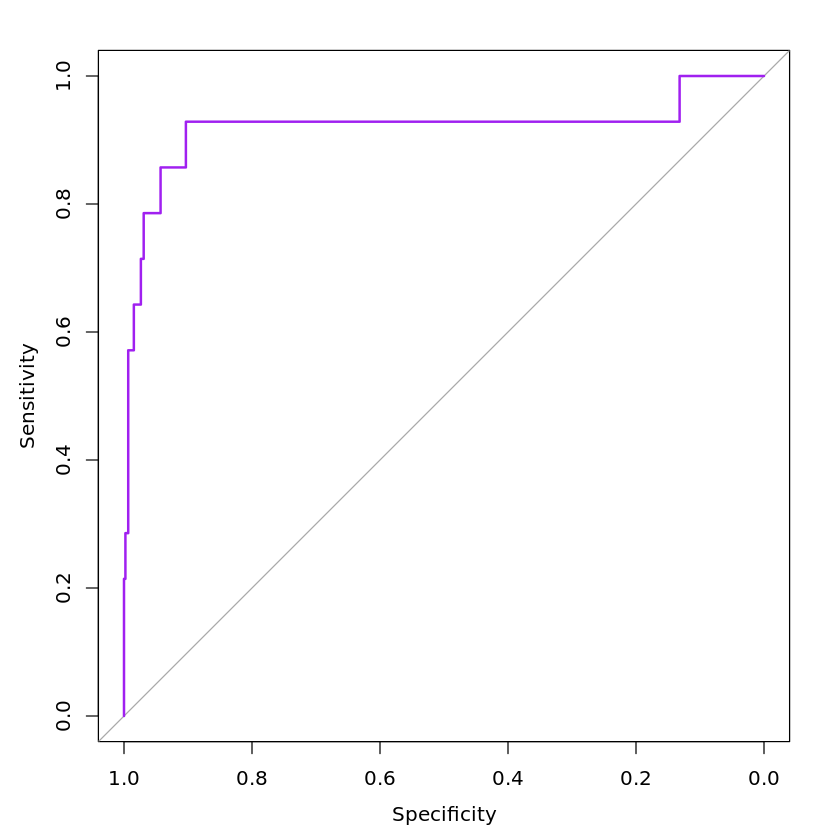

In [163]:
plot(roc1, col = 'purple')